# Investigate trend in the counts of prescriptions
This notebook queries the `CB_FDM_PrimaryCare_v7.tbl_SRPrimaryCareMedication` table and plots the monthly count of prescriptions for distinct patients.

The motivation for this investigation is that the prescriptions in the previous four months is far lower than expected. I'm wondering if it is an consequence of rolling updates. I want to see if there is a threshold beyond which all the prescriptions are up to date. I would detect something like this if the count of monthly prescriptions for unique patients increases as I go further back in time and then steadies.

The clinical members of the research team say there has not been any change in guidance that might have led to changes in the prescribing rates of the medications of interest.

## Load prerequisites.

In [3]:
import pandas
try:
    import fivecentplots
except:
    !pip install fivecentplots
    import fivecentplots

## Instantiate the bigquery client and define BigQuery string.

There are three sets of prescriptions that I'm interested in:
- Psychosis and related conditions
- Hypnotics and anxiolytics
- Antidepressants

The specific drugs of interest are:

| Drugs used in psychoses <br /> and related disorders | Hypnotics and anxiolytics | Antidepressants |
| --- | --- | ---
| Risperidone | Diazepam | Clomipramine |
| Olanzapine | Zopiclione | Citalopram |
| Quetiapine | | Duloxetine |
| | | Excitalopram |
| | | Mirtazapine |
| | | Paroxetine |
| | | Sertraline |
| | | Trazodone |
| | | Venlafaxine |
| | | Fluoxetine |

In [3]:
sql_start = \
"""
SELECT
  EXTRACT(YEAR FROM datemedicationstart) AS year
  ,EXTRACT(MONTH FROM datemedicationstart) AS month
  ,COUNT(DISTINCT person_id) AS cnt_person
FROM
  `yhcr-prd-phm-bia-core.CB_FDM_PrimaryCare_V7.tbl_srprimarycaremedication`
"""

sql_middle_psychosis = \
"""
WHERE
  (nameofmedication LIKE '%Risperidone%'
  OR nameofmedication LIKE '%Olanzapine%'
  OR nameofmedication LIKE '%Quetiapine%')
  AND EXTRACT(YEAR FROM datemedicationstart) >= 2013
"""

sql_middle_hyponotics = \
"""
WHERE
  (nameofmedication LIKE '%Diazepam%'
  OR nameofmedication LIKE '%Zoplicone%')
  AND EXTRACT(YEAR FROM datemedicationstart) >= 2013
"""

sql_middle_antidepressants = \
"""
WHERE
  (nameofmedication LIKE '%Clomipramine%'
  OR nameofmedication LIKE '%Citalopram%'
  OR nameofmedication LIKE '%Duloxetine%'
  OR nameofmedication LIKE '%Escitalopram%'
  OR nameofmedication LIKE '%Mirtazapine%'
  OR nameofmedication LIKE '%Paroxetine%'
  OR nameofmedication LIKE '%Sertraline%'
  OR nameofmedication LIKE '%Venlafaxine%'
  OR nameofmedication LIKE '%Fluoxetine%')
  AND EXTRACT(YEAR FROM datemedicationstart) >= 2013
"""

sql_end = \
"""
GROUP BY
  year, month
ORDER BY
  year, month
"""

## Run the Bigquery statements for each set of prescriptions.

In [4]:
df_psychosis = pandas.read_gbq(sql_start + sql_middle_psychosis + sql_end)
df_hyponotics = pandas.read_gbq(sql_start + sql_middle_hyponotics  + sql_end)
df_antidepressants = pandas.read_gbq(sql_start + sql_middle_antidepressants + sql_end)

## Plot the trends in prescription counts

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Helvetica, Avant Garde, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Helvetica, Avant Garde, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Helvetica, Avant Garde, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families we

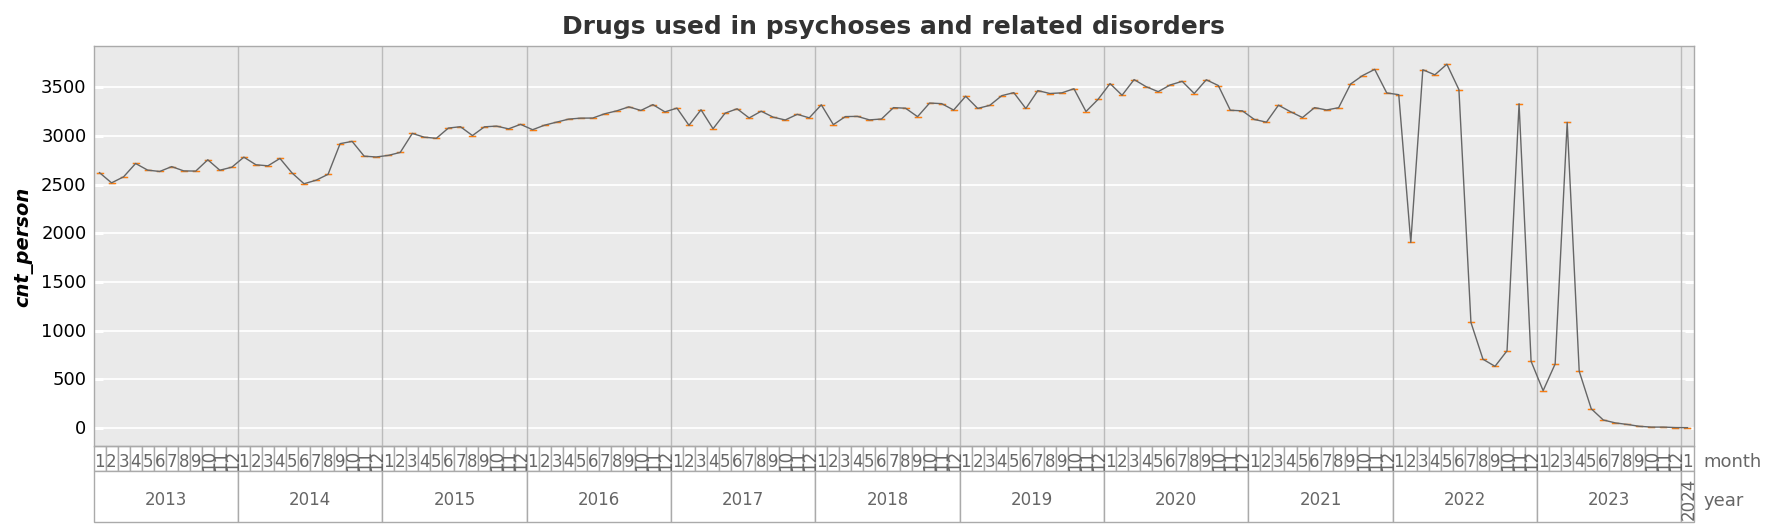

In [5]:
fivecentplots.boxplot(df = df_psychosis,
                      y = 'cnt_person',
                      groups = ['year','month'],
                      title = 'Drugs used in psychoses and related disorders',
                      markers = False,
                      ax_size = [1600,400])

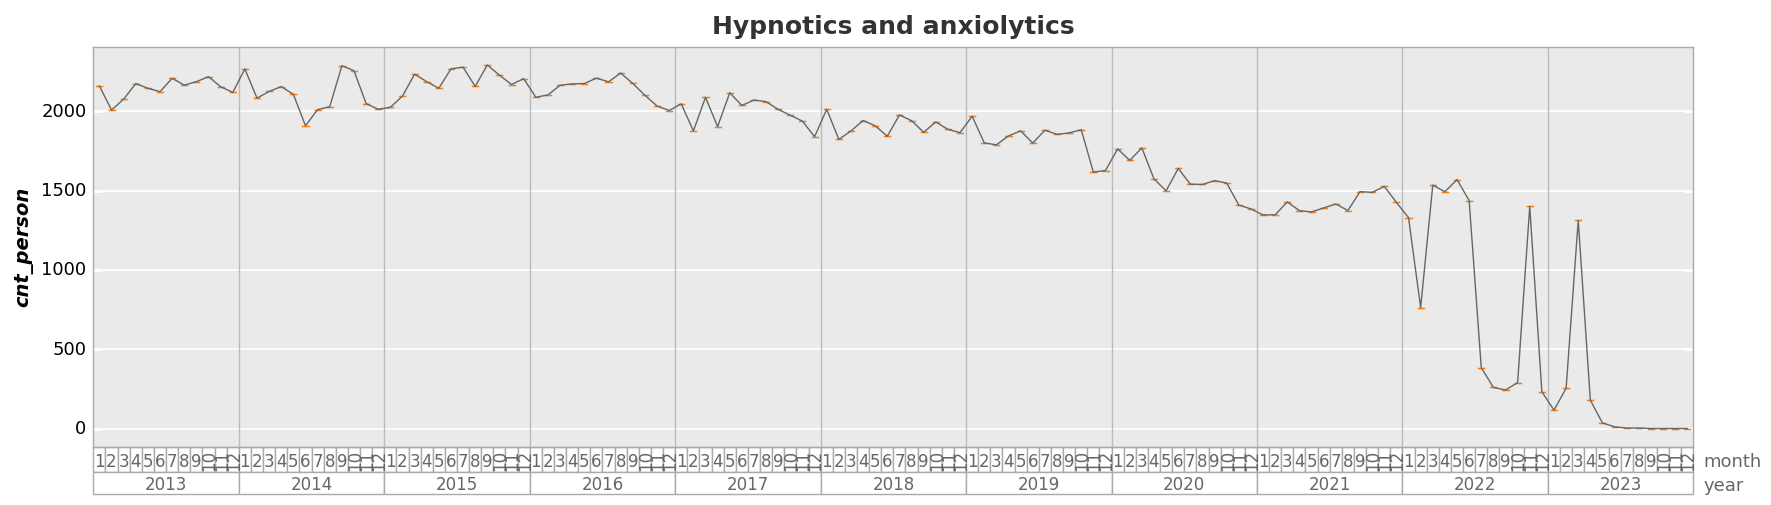

In [6]:
fivecentplots.boxplot(df = df_hyponotics,
                      y = 'cnt_person',
                      groups = ['year','month'],
                      title = 'Hypnotics and anxiolytics',
                      markers = False,
                      ax_size = [1600,400])

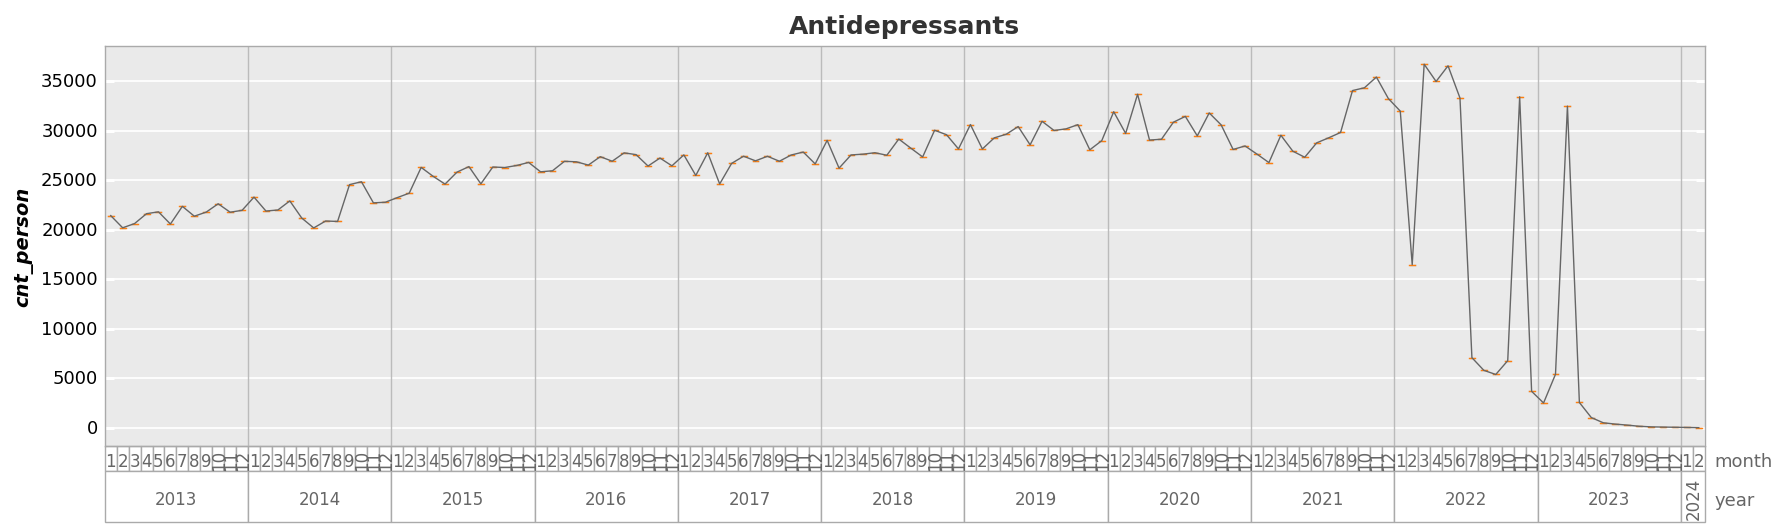

In [7]:
fivecentplots.boxplot(df = df_antidepressants,
                      y = 'cnt_person',
                      groups = ['year','month'],
                      title = 'Antidepressants',
                      markers = False,
                      ax_size = [1600,400])

## Conclusion

Something weird happens after the end of 2021. Therefore, I will only use data before 31st December 2021.